In [1]:
#Pandas: Reading and analyzing data
import pandas as pd
#Numerical calcuations
import numpy as np
#statistical data visualization
import seaborn as sns
#Use Dates in Datetime Format
import datetime
#Tensorflow
#Create Folder for modelling checkpoint
import os
# caution: path[0] is reserved for script path (or '' in REPL)
cwd = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)

In [2]:
print("Get data")
#Read CSV file to pandas dataframe; encoding= 'unicode_escape': Decode from Latin-1 source code. Default UTF-8.
df = pd.read_csv(cwd+'/data/d03_data_processed/d03_data_processed.csv', encoding= 'unicode_escape', index_col='Date')
#Display smart meter names and amount
smart_meter_names = df.columns[2:-4]
print("Selected clients: ", len(smart_meter_names))

Get data
Selected clients:  33


In [3]:
df.head(2)

,temp,rhum,0101-ZE01-70,0101-ZE01-74,0141-ZE01-70,0141-ZE01-74,0145-ZE02-70,0213-ZE01-71,0223-ZE01-71,0223-ZE02-71,...,0430-ZE01-70,0439-ZE01-70,0439-ZE01-72,0439-ZE02-70,5311-ZE01-70,6907-ZE01-74,hour sin,hour cos,dayofweek sin,dayofweek cos
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.325866,0.963855,0.0,0.221036,0.164777,0.164777,0.055199,0.0,0.000000,0.324802,...,0.0,0.000000,0.0,0.286572,0.0,0.20283,0.692833,0.0,0.012536,0.388740
2019-01-01 01:00:00,0.323829,0.963855,0.0,0.000000,0.165214,0.165214,0.000000,0.0,0.413548,0.305612,...,0.0,0.605169,0.0,0.000000,0.0,0.20021,0.172013,0.0,0.008717,0.407044


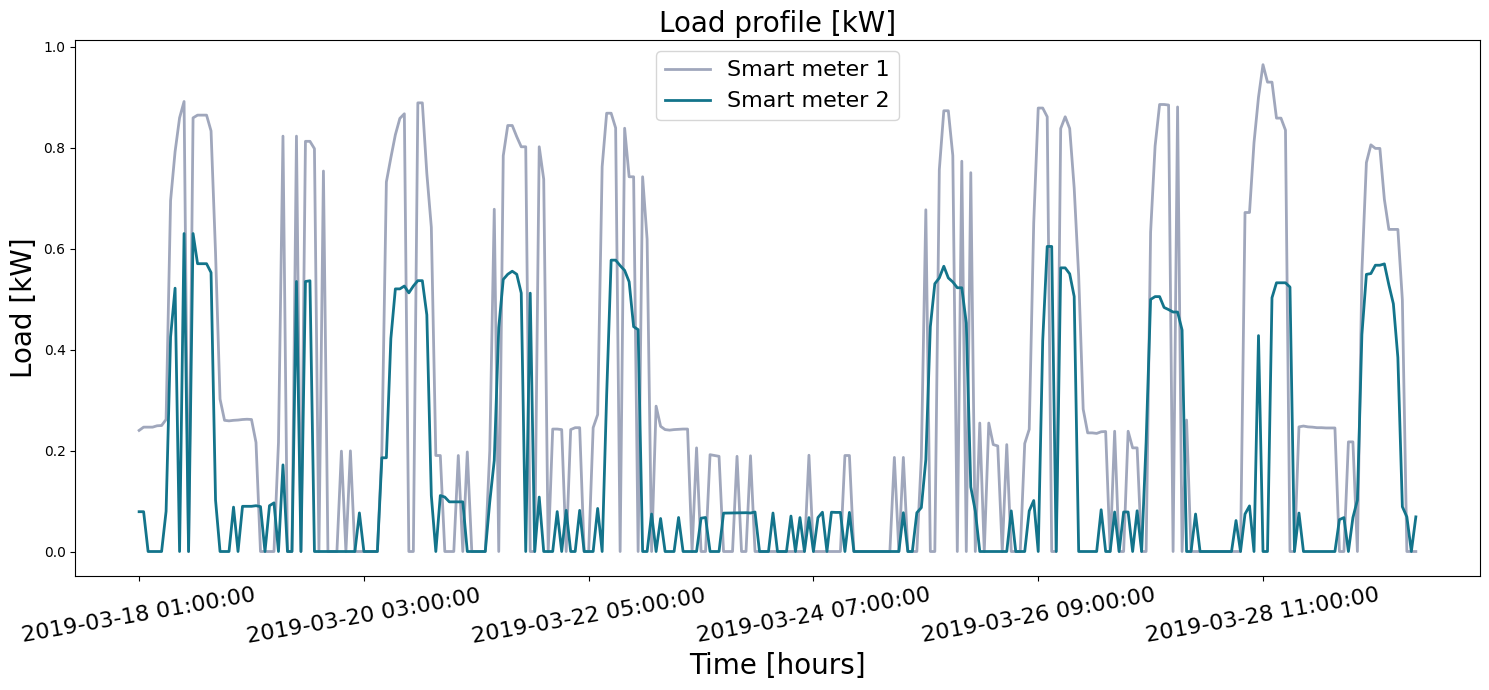

In [5]:
#8, 11, 12, 19, 24

plot1 = df[smart_meter_names[11:13]][1825:2110].plot(
             figsize=(15,7), 
             kind="line",
             color = ['#A0A7BC', '#13748B'],
             lw=2,
             rot=10
            )
plot1.set_title('Load profile [kW]', fontsize=20)
plot1.set_xlabel('Time [hours]', fontsize=20)
plot1.set_ylabel('Load [kW]', fontsize=20)
plot1.xaxis.set_tick_params(labelsize=16)
plot1.figure.tight_layout()
plot1.legend(["Smart meter 1", "Smart meter 2"], fontsize=16)
plot1.figure.savefig('exampleLoadProfilesOfTwoSmartMeters.png', bbox_inches="tight")


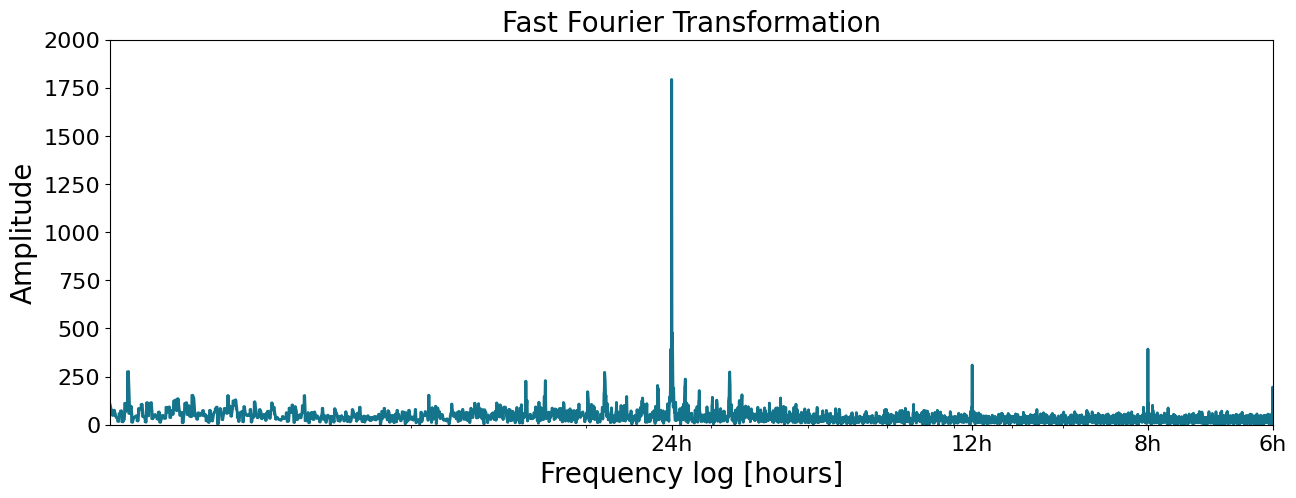

In [18]:
#Tensorflow
import tensorflow as tf
#plot numpy array
import matplotlib.pyplot as plt

fft = tf.signal.fft(df[smart_meter_names[11]])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['0213-ZE01-71'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.figure(figsize=(15, 5))
plt.plot(f_per_year, np.abs(fft), "#13748B", lw=2, )
plt.step(f_per_year, np.abs(fft), "#13748B")
plt.xscale('log')
plt.ylim(0, 2000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524,365.2524*2,365.2524*3,365.2524*4], labels=['1Year', '24h','12h','8h','6h'], fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(100.0, 365.2524*4)

plt.title('Fast Fourier Transformation', fontsize=20)
plt.xlabel('Frequency log [hours]', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.savefig('fastFourierTransformationLoadData.png', bbox_inches="tight")

In [111]:
# get current working directory and go back one folder to main working directory
cwd = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
# set path to load data file
load_data_path = '/data/d02_data_cleaned/d02_data_cleaned.csv'
path = cwd + load_data_path
  
#Read CSV file to pandas dataframe; encoding= 'unicode_escape': Decode from Latin-1 source code. Default UTF-8.
df = pd.read_csv(path, encoding= 'unicode_escape', index_col='Date')
df.index = pd.to_datetime(df.index)
#Drop columns with insignificant weather features
df = df[['temp', 'rhum', 'wdir','prcp', 'wspd','wpgt','coco','0404-ZE01-70']]

smart_meter_names = df.columns[2:-2]
print(len(smart_meter_names))

# list(data) or
#display(df.describe().transpose())
#display(df)
list(df.columns)
df.head(1)

4


,temp,rhum,wdir,prcp,wspd,wpgt,coco,0404-ZE01-70
Date,,,,,,,,
2019-01-01,5.3,97.0,211.0,0.0,11.1,16.7,4.0,22.07784


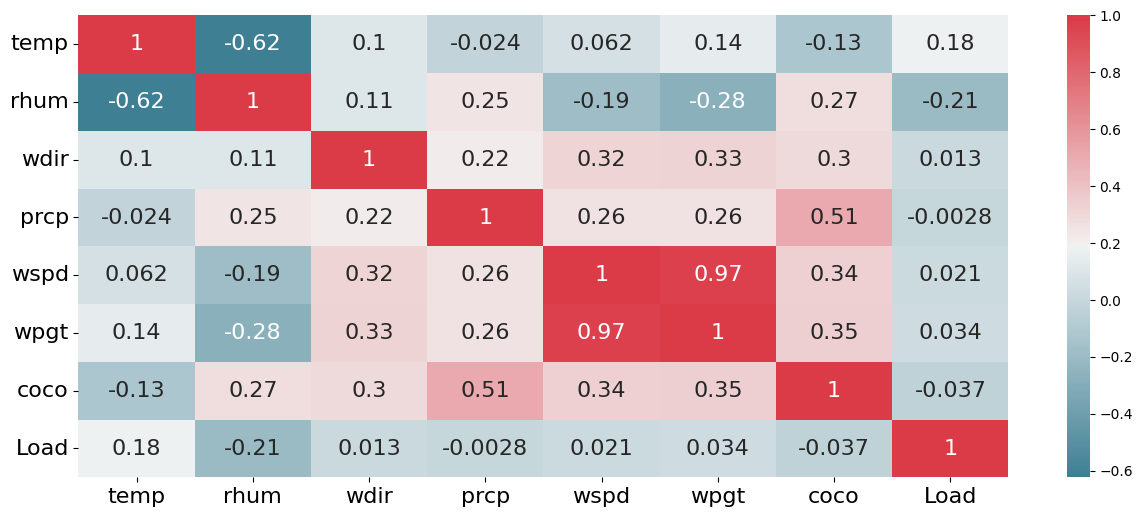

In [112]:

df_feature = df

FEATURES = [
    # 'dayofyear', 'quarter', 'dayofmonth', 'weekofyear', "wdir", "wspd", "wpgt", "coco", 
    'hour', 'dayofweek', 'month', 'year', "temp", "dwpt", "rhum", "prcp","coco"
]
TARGET = ['0404-ZE01-70']

df_feature = df_feature.rename(columns={'0404-ZE01-70': 'Load'})
#Feature selection
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(15, 6))
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
#Compute pairwise correlation of columns, excluding NA/null values.
corr = df_feature.corr(method="pearson")
#Plot heatmap, use _ to hide instance output
#
plot3 = sns.heatmap(data=corr, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), #color map
            square=False, 
            annot=True,
            annot_kws={"size":16}
           )
plot3.figure.savefig('pearsonCorrleationWeather.png', bbox_inches="tight")